Max rawdown：use microsoft price as an example and this can be applied to any Fund NAV to calc max DD

In [99]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 

In [100]:
def importdata(tickers,start="2020-01-01",end="2022-01-31"):
    data = yf.download(tickers, 
                       start = start, end = end, 
                       progress= False)['Adj Close']
    return(data)

###Example: 
data = []
data= pd.DataFrame(importdata("MSFT").dropna())
data.head()

,Adj Close
Date,
2020-01-02,154.779480
2020-01-03,152.852280
2020-01-06,153.247391
2020-01-07,151.850067
2020-01-08,154.268814


Max DD = 从历史数据的初始点到每一个时间点之间已出现的最高价格 - 现在的价格

In [101]:
data['RollMax'] = data['Adj Close'].cummax()
data['ValueDrawdown'] = data['Adj Close']-data['RollMax']
data['PctDrawdown'] = data['Adj Close']/data['RollMax']-1
data.head()

,Adj Close,RollMax,ValueDrawdown,PctDrawdown
Date,,,,
2020-01-02,154.779480,154.77948,0.000000,0.000000
2020-01-03,152.852280,154.77948,-1.927200,-0.012451
2020-01-06,153.247391,154.77948,-1.532089,-0.009899
2020-01-07,151.850067,154.77948,-2.929413,-0.018926
2020-01-08,154.268814,154.77948,-0.510666,-0.003299


In [102]:
MaxValueDD = '{:.0f}'.format(abs(min(data['ValueDrawdown'])))
MaxValueDDDate = data.index[data['ValueDrawdown'] == min(data['ValueDrawdown'])].tolist()

MaxpctDD = '{:.1%}'.format(abs(min(data['PctDrawdown'])))
MaxpctDDDate = data.index[data['PctDrawdown'] == min(data['PctDrawdown'])].tolist()

Max Value DD is 54 on 2022-01-25 00:00:00
Max Value DD is 28.0% on 2020-03-16 00:00:00


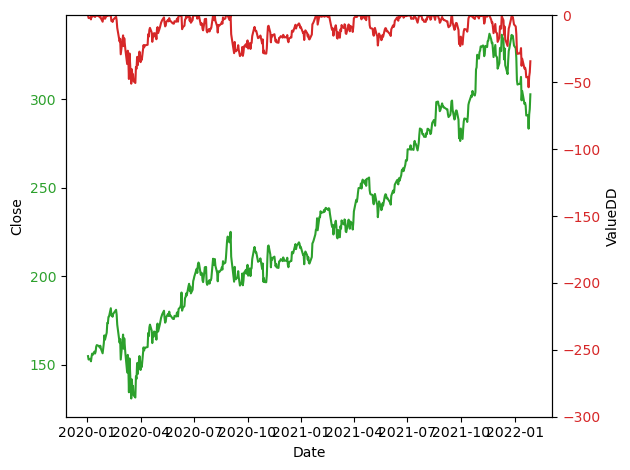

(-1.0, 0.0)

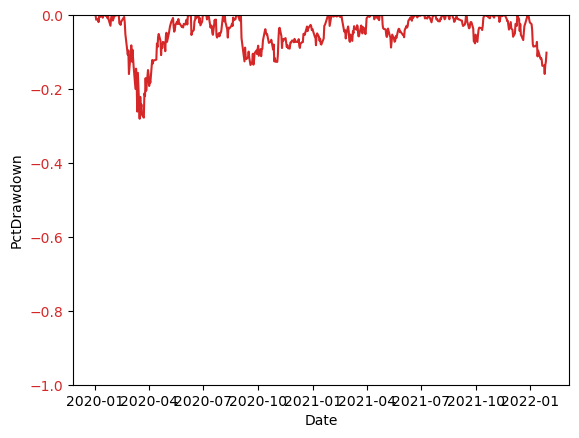

In [103]:
print('Max Value DD is ' + MaxValueDD + ' on ' + str((MaxValueDDDate.pop())))
print('Max Value DD is ' + MaxpctDD + ' on ' + str((MaxpctDDDate.pop())))

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.plot(data.index, data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('ValueDD')
ax2.plot(data.index, data['ValueDrawdown'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-300, 0])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
 
    
fig, ax2 = plt.subplots()

color = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel('PctDrawdown')
ax2.plot(data.index, data['PctDrawdown'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-1, 0])
